In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

In [49]:
df = pd.read_csv('pimadataorig.csv')
df

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
X = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin',
       'bmi', 'diab_pred', 'age']]
y = df ['diabetes']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_test_pred_logistic = logistic_model.predict(X_test)
#Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_test_pred_dt = decision_tree_model.predict(X_test)
#Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_test_pred_knn = knn_model.predict(X_test)
#Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)

Logistic Regression:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix for Test:
[[79 20]
 [18 37]]
recall_score	: 0.6727272727272727
precision_score	: 0.6491228070175439
accuracy_score	: 0.7532467532467533


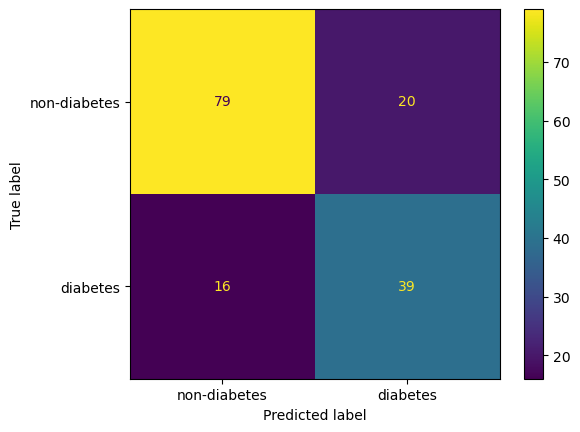

In [82]:
def plot_confusion_matrix(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['non-diabetes', 'diabetes'])
    cmd.plot()

print("Logistic Regression:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_logistic))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_logistic))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_logistic))
print('precision_score\t:', precision_score(y_test, y_test_pred_logistic))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_logistic))

plot_confusion_matrix(y_test, y_test_pred)

In [83]:
print("Decision Tree:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_dt))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_dt))
print('precision_score\t:', precision_score(y_test, y_test_pred_dt))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_dt))

Decision Tree:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix for Test:
[[77 22]
 [17 38]]
recall_score	: 0.6909090909090909
precision_score	: 0.6333333333333333
accuracy_score	: 0.7467532467532467


In [84]:
print("Random Forest:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_rf))
print('precision_score\t:', precision_score(y_test, y_test_pred_rf))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_rf))

Random Forest:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix for Test:
[[78 21]
 [20 35]]
recall_score	: 0.6363636363636364
precision_score	: 0.625
accuracy_score	: 0.7337662337662337


In [85]:
print("K-Nearest Neighbors (KNN):")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_knn))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_knn))
print('precision_score\t:', precision_score(y_test, y_test_pred_knn))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_knn))

K-Nearest Neighbors (KNN):
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

Confusion Matrix for Test:
[[79 20]
 [27 28]]
recall_score	: 0.509090909090909
precision_score	: 0.5833333333333334
accuracy_score	: 0.6948051948051948


In [86]:
print("Naive Bayes:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_nb))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_nb))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_nb))
print('precision_score\t:', precision_score(y_test, y_test_pred_nb))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_nb))

Naive Bayes:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix for Test:
[[79 20]
 [16 39]]
recall_score	: 0.7090909090909091
precision_score	: 0.6610169491525424
accuracy_score	: 0.7662337662337663


### Parameter Tuning
Mencari parameter model yang memberikan performa terbaik

1.Greedy Search (Mencoba satu-satu)
2.Random Search ()
3.Bayesian Search

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [90]:
records = []
for w in ['uniform', 'distance']:
    for n in range(1, 10):
        model= KNeighborsClassifier(n_neighbors=n, weights=w)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        recall_test = recall_score(y_test, y_test_pred)
        records.append({
            'weight': w, 'n_neighbors': n, 'recall': recall_test
        })

In [92]:
pd.DataFrame(records).sort_values('recall', ascending=False).head()

,weight,n_neighbors,recall
8,uniform,9,0.527273
17,distance,9,0.509091
11,distance,3,0.509091
2,uniform,3,0.509091
16,distance,8,0.509091


In [93]:
model= KNeighborsClassifier(n_neighbors=3, weights='distance')
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [97]:
C_list = np.arange(0.5, 10, 0.5).tolist()

In [104]:
records = []
for c in C_list
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for d in range(2, 15):
            model= SVC(C=c, kernel=k, degree=d)
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            recall_test = recall_score(y_test, y_test_pred)
            records.append({
                'weight': w, 'n_neighbors': n, 'recall': recall_test
            })

SyntaxError: invalid syntax (772784444.py, line 2)

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance']
}
model = KNeighborsClassifier()
grid_search  = GridSearchCV(
    estimator=model, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [101]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 4, 'weights': 'distance'}, 0.601218161683278)

In [103]:
model = KNeighborsClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
recall_score(y_test, y_pred_test)

0.509090909090909

### Random Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_neighbors': list(range(1,20)),
    'weights': ['uniform','distance']
}
model = KNeighborsClassifier()
random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_dist, scoring='recall', cv=5, n_iter=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall')

In [ ]:
random_search.best_params_

### Save Models

In [108]:
import pickle as pkl
import joblib

In [109]:
with open('model_name.pkl', 'wb') as f:
    joblib.dump(model, f)

In [114]:
with open('model_name.joblib', 'wb') as f:
    joblib.dump(model, f)

### Load Models

In [115]:
with open('model_name.pkl', 'rb') as f:
    model_1 = pkl.load(f)

In [116]:
with open('model_name.joblib', 'rb') as f:
    model_2 = joblib.load(f)

In [117]:
model

KNeighborsClassifier()